In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("../Dataset/PS_train.csv")
val_df = pd.read_csv("../Dataset/PS_dev.csv")
test_df = pd.read_csv("../Dataset/PS_test.csv")

In [4]:
with pd.option_context('display.max_colwidth', 0):
    display(train_df.sample(n=5))

,content,labels
140,பாட்டு பாடச் சொல்லி ஆர்ப்பரித்த உறவுகளின் கூட்டம் . \n\nஓட்டுப் போடப் போற பெண்ணே ஒதுங்கி நிக்காத \nஎன பாட்டுப் பாடி வாக்குச் சேகரித்த \n\n-செந்தமிழன் சீமான் \nதலைமை ஒருங்கிணைப்பாளர்\n\n\n#மக்களின்_சின்னம்_மைக்\n#Mike_VoiceOfPeople\n#Elections2024\n#தஞ்சாவூர் #மன்னார்குடி,Positive
1919,🔴LIVE : விசிகவுக்கு எத்தனை தொகுதி | நாங்க அன்புமணி மாதிரி இல்ல - சஸ்பென்ஸ் உடைக்கும் கௌதம சன்னா?\n#Vck #Thirumavalavan #DMK #Admk #Stalin #EdappadiPalanisamy #Udhayanidhi #Edappadi #Thirumavalavan #ZeeTamilNews\n,Substantiated
3469,உரலுக்கு உளக்கை தான் பொருந்தும்,None of the above
1980,#DMKFailsTN \n\nதேனி களப்பணியில் ...தங்கம்🤷😅😆,Neutral
3786,திராவிட மாடல் அரசின்' பல்வேறு புதுமையான திட்டங்கள்!! #mkstalin,Negative


In [4]:
train_df = pd.read_csv("../Data Analysis/PS_train.csv")
val_df = pd.read_csv("../Data Analysis/PS_dev.csv")
test_df = pd.read_csv("../Data Analysis/PS_test.csv")

In [5]:
train_df.shape, val_df.shape, test_df.shape

((4352, 2), (544, 2), (544, 3))

In [6]:
train_df.groupby("labels").size()

labels
Negative              406
Neutral               637
None of the above     171
Opinionated          1361
Positive              575
Sarcastic             790
Substantiated         412
dtype: int64

In [7]:
val_df.groupby("labels").size()

labels
Negative              51
Neutral               84
None of the above     20
Opinionated          153
Positive              69
Sarcastic            115
Substantiated         52
dtype: int64

In [8]:
test_df.groupby("labels").size()

labels
Negative              46
Neutral               70
None of the above     25
Opinionated          171
Positive              75
Sarcastic            106
Substantiated         51
dtype: int64

In [8]:
import re
def preprocessing(df):
    url_pattern = r'https?://\S+|www\.\S+'
    
    def count_urls(text):
        return len(re.findall(url_pattern, text))

    df['hashtag_count'] = df['content'].apply(lambda x: x.count('#'))
    df['mentions_count'] = df['content'].apply(lambda x: x.count('@'))
    df['url_count'] = df['content'].apply(count_urls)
    return df

df = preprocessing(train_df)

In [9]:
val_df = preprocessing(val_df)
test_df = preprocessing(test_df)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4352 entries, 0 to 4351
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   content         4352 non-null   object
 1   labels          4352 non-null   object
 2   hashtag_count   4352 non-null   int64 
 3   mentions_count  4352 non-null   int64 
 4   url_count       4352 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 170.1+ KB


In [11]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   content         544 non-null    object
 1   labels          544 non-null    object
 2   hashtag_count   544 non-null    int64 
 3   mentions_count  544 non-null    int64 
 4   url_count       544 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 21.4+ KB


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              544 non-null    object
 1   content         544 non-null    object
 2   labels          544 non-null    object
 3   hashtag_count   544 non-null    int64 
 4   mentions_count  544 non-null    int64 
 5   url_count       544 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 25.6+ KB


In [13]:
print(val_df['hashtag_count'].sum())
print(val_df['mentions_count'].sum())
print(val_df['url_count'].sum())

2837
0
0


In [14]:
print(df['hashtag_count'].sum())
print(df['mentions_count'].sum())
print(df['url_count'].sum())

22500
9
0


In [15]:
print(test_df['hashtag_count'].sum())
print(test_df['mentions_count'].sum())
print(test_df['url_count'].sum())

2632
1
0


In [16]:
import re
import emoji

def remove_urls(text):
    """Remove URLs from the given text."""
    url_pattern = r'https?://\S+|www\.\S+'
    return re.sub(url_pattern, '', text)
def handle_emojis(text):
    # Remove emojis
    text = emoji.replace_emoji(text, '')
    # OR keep emojis as text
    # text = emoji.demojize(text)
    return text
def remove_hashtags(text):
    """Remove hashtags from the given text."""
    if '#' in text:
        text = text.replace('#', '')
    hashtag_pattern = r'#\w+'
    return re.sub(hashtag_pattern, '', text)


def remove_mentions(text):
    """Remove mentions from the given text."""
    # Remove mentions with no space before
    if '@' in text:
        text = text.replace('@', '')
    
    mention_pattern = r'@\S+\b'
    text = re.sub(mention_pattern, '', text)
    # Check if the mention is at the end of the text
    if text.endswith(' @'):
        text = text[:-2]  # Remove the space and '@'

    return text
def remove_dollars(text):
    """Remove $ from the given text."""
    if "$" in text:
        text = text.replace('$','')
    return text
def remove_consecutive_punctuation(text):
    """Remove consecutive punctuation from the given text."""
    text = re.sub(r'([.,!?;:|]){2,}', r'\1', text)
    return str(text).lower()

def processing(text):
    """Clean the given tweet by removing URLs, hashtags, and mentions."""
    cleaned_text = remove_urls(text)
    cleaned_text = handle_emojis(cleaned_text)
    cleaned_text = remove_hashtags(cleaned_text)
    cleaned_text = remove_mentions(cleaned_text)
    cleaned_text = remove_dollars(cleaned_text)
    cleaned_text = remove_consecutive_punctuation(cleaned_text)
    return cleaned_text

In [17]:
df['content'] = df['content'].apply(lambda x: processing(x))
test_df['content'] = test_df['content'].apply(lambda x: processing(x))

In [18]:
val_df['content'] = val_df['content'].apply(lambda x: processing(x))

In [19]:
import re
def preprocessing(df):
    url_pattern = r'https?://\S+|www\.\S+'
    
    def count_urls(text):
        return len(re.findall(url_pattern, text))

    df['hashtag_count'] = df['content'].apply(lambda x: x.count('#'))
    df['mentions_count'] = df['content'].apply(lambda x: x.count('@'))
    df['dollar_count'] = df['content'].apply(lambda x: x.count('$'))
    df['url_count'] = df['content'].apply(count_urls)
    return df

df = preprocessing(df)

In [20]:
val_df = preprocessing(val_df)
test_df = preprocessing(test_df)

In [21]:
print(df['url_count'].sum())
print(df['mentions_count'].sum())
print(df['hashtag_count'].sum())
print(df['dollar_count'].sum())

0
0
0
0


In [22]:
print(val_df['url_count'].sum())
print(val_df['mentions_count'].sum())
print(val_df['hashtag_count'].sum())
print(val_df['dollar_count'].sum())

0
0
0
0


In [23]:
print(test_df['url_count'].sum())
print(test_df['mentions_count'].sum())
print(test_df['hashtag_count'].sum())
print(test_df['dollar_count'].sum())

0
0
0
0


In [24]:
with pd.option_context('display.max_colwidth', 0):
    display(df.sample(n=10))

,content,labels,hashtag_count,mentions_count,url_count,dollar_count
2458,புகழ் வணக்கம் \n\nமக்களின்_சின்னம்_மைக்\nmike_voiceofpeople\n,Positive,0,0,0,0
441,1000 ரூபாய் க்கு பொறந்தவங்கனு சொல்லிட்டாங்களே.\n\nஇப்பவே செத்து போயிராதிங்க டா உபிஸ்.\n\nநாளைக்கு 200 ரூபாய் க்கு பொறந்தவங்கனு சொல்ல போறோம் சேத்து ஒப்பாரி வைங்க \n\nஆயிரம்_ரூபாய்க்கு_பிறந்தவனுங்க,Sarcastic,0,0,0,0
770,இன்று ஜோலார்பேட்டை நகராட்சியில் நடைப்பெற்ற பரப்புரை மற்றும் துண்டறிக்கை பரப்புரை.\n\nநாம்தமிழர்கட்சி\nசீமான்‌\nnaamtamilarkatchi seeman ntk\nntk_symbol_மைக்,Opinionated,0,0,0,0
36,கன்னியாகுமரி மக்கள் - ஒலிவாங்கி ( மைக் ) சின்னத்தில் வாக்களிப்போம் | நாளைய தலைமுறைக்கு வாழ்வளிப்போம் \n\nஇன்னும் 05 ஏ நாளில் கையில் மை - மைக் சின்னத்தில் நம்முடைய கை - அடுத்த தலைமுறையினருக்கான வாழ்வியல் \n\nமக்களின்_சின்னம்_மைக்\nmike_voiceofpeople\n,Neutral,0,0,0,0
3472,மாதம் 1000 ருபாய் அரசு கொடுக்கும் பணம் எங்கிருந்து வருது? seeman சீமான் ntk politics tamilnews,Neutral,0,0,0,0
4178,கயல்விழி காளிமுத்து 100கோடி சொத்துக்களின் கணவர் சீமானின் பிச்சைக்கார தமிழ் தேசியம் புரட்சிகள் ntk சீமான் நாதக,Sarcastic,0,0,0,0
3074,தோல்வியடைந்த எட்டாவது கரு கலைப்பு. \nஉரிமை கோரும் முக்த்தார். \nதிராவிடமாடல்பரிதாபங்கள்,Substantiated,0,0,0,0
2199,"பாஜகவிற்கு வடக்கில் நடக்கும் சோதனை,அமித்ஷா மோடி தமிழக வருகை கேள்விக்குறிதான்?\n\nfull videowatch now : \n\ntharasushyam modi bjp tamilnews dmk admk edappadi tamilnews amithsha congress rahulgandhi",Opinionated,0,0,0,0
3280,ஸ்டாலின் ஒரு தத்தி\nஎனக்குலாம் ஒரு பொருட்டே இல்ல.\n\n~ குருநாதர்,Sarcastic,0,0,0,0
2962,நாம் தமிழர் வேட்பாளர் audi car la வேட்புமனு தாக்கல் பன்ன போறாங்க \n\nஉடன்பிறப்புகள் கண்ணில் படும்படி செய்யவும் \n\n,Negative,0,0,0,0


In [25]:
with pd.option_context('display.max_colwidth', 0):
    display(val_df.sample(n=10))

,content,labels,hashtag_count,mentions_count,url_count,dollar_count
393,தீண்டாமைச்சுவர் \nதிராவிடச்சுவர் \nகுட்டிச்சுவர் \nதீண்டாமைக்கட்சி\nவெட்பாளர் பெயர் ? \nகட்சிப்பெயர்?\nநவீன தீண்டாமை.\nஇதுல மத்தவங்கல குறை சொல்ல வந்திடுவாங்க.சாதி கலவர வாதிகள்\nவிசிக vck dmk dmkfails dmkfailstn dmkalliance,Negative,0,0,0,0
534,"""சீமான் அண்ணா love u."" ""me too."" ""ஏய் விடுடா."" ஒரு நொடியில் மாறிய முகம் thanthitv seeman ntk \n",Neutral,0,0,0,0
230,timeanalysis\n\nமேலே உள்ள hashtag-ஐ (timeanalysis) click செய்தால் the india minute election analysis வெளியிட்டுள்ள அனைத்து கருத்துக் கணிப்பு முடிவுகளையும் தெரிந்து கொள்ளலாம்.\nmkstalin edappadipalaniswami modi india indiaalliance seeman ntk bjp aiadmk dmk elections2024,Opinionated,0,0,0,0
29,“இவர்கள் செய்யும் கேலிகளையும் கிண்டல்களையும் பார்க்காமால் அண்ணன் சீமான் சொல்வதை ஒரு முறை கேட்டுருந்தால்” என்று நினைத்துதான் கடைசியில் இரண்டு வார்த்தைகளை சொல்லியிருப்பார் என்று நாம் நம்புகிறேன்! \n\n விசில்போடு_மைக்ல_ஓட்டுபோடு \n\n,Positive,0,0,0,0
427,உள்ளூர் பிரச்சனை நீயே பாத்துக்கடா seeman \nசீமானின்_சின்னம்_ஒலிவாங்கி_மைக் \nntk_symbol_mike\nதமிழ்நாட்டுக்கு_வேண்டாம்_அதிமுக_பிஜேபி_காங்கிரஸ்_திமுக \nsay_no_to_admk_bjp_congress_dmk\nsay_no_to_abcd,Substantiated,0,0,0,0
14,"இன்று 13-4-2024 தூத்துக்குடி நா.ம.தொகுதி நா.த.க.வேட்பாளர் மரு.ரொவீனா ரூத் ஜேன் அவர்களுக்கு கோயில்பட்டி, கழுகுமலை, கயத்தாறு,கடம்பூர் சுற்றுவட்டார கிராமங்களில் பரப்புரை- மக்கள் சந்திப்பு\nதமிழ் மக்களிடம் மாற்று அரசியலுக்கான ஏக்கமும் எதிர்பார்ப்பும் இருப்பதை உணர முடிந்தது.",Substantiated,0,0,0,0
296,urimaikural | எதிர்வரும் நாடாளுமன்ற தேர்தலில் பெண்களின் ஆதரவு யாருக்கு?\n\nadmk admknews debate elections2024 tnpolitics dmkfails mkstalingovt edappadipalaniswami votingawareness,Opinionated,0,0,0,0
220,மேடையில் மெய்மறந்து தொடர்ந்து பாடல் பாடி அசத்திய சீமான் \nseeman ntk salem loksabhaelections2024 electioncampaign thanthitv \n\n,Opinionated,0,0,0,0
25,இந்த கேடுகெட்ட அரசாங்கத்திற்கு என்னைக்கு தான் முடிவு கட்டுவாங்களோ மக்கள் dmkfails திருட்டுதிமுக lockup_death திமுக_நாட்டுக்கும்_வீட்டுக்கும்_கேடு,Neutral,0,0,0,0
312,மருத்துவ படிப்பை நிறுத்திவிட்டு வேட்பாளரா ?\n\nபைத்தியமே நீ படிக்கலன்றதுக்காக எல்லாரையும் படிப்பை நிறுத்தி விட்டு பிச்சை எடுக்க வைக்கலாம் பார்க்கிறாயா ?\n\nseeman novotetobjp,Sarcastic,0,0,0,0


In [26]:
df['Length'] = df['content'].apply(lambda x: len(x.split(" ")))

In [27]:
val_df['Length'] = val_df['content'].apply(lambda x: len(x.split(" ")))

In [28]:
df['Length'].describe()

count    4352.000000
mean       17.853401
std        12.309896
min         1.000000
25%        11.000000
50%        17.000000
75%        23.000000
max       348.000000
Name: Length, dtype: float64

In [29]:
val_df['Length'].describe()

count    544.000000
mean      17.119485
std        8.415459
min        2.000000
25%       11.000000
50%       16.000000
75%       22.000000
max       78.000000
Name: Length, dtype: float64

<Axes: title={'center': 'Tweet Length Distribution'}, ylabel='Frequency'>

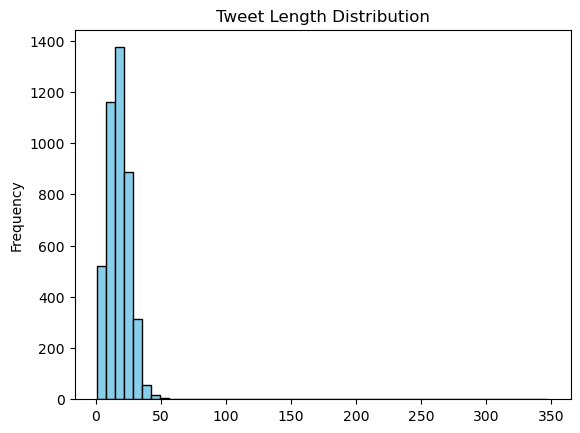

In [30]:
df['Length'].plot(kind='hist', bins=50, title='Tweet Length Distribution', color='skyblue', edgecolor='black')

In [31]:
df[df['Length']==1]

,content,labels,hashtag_count,mentions_count,url_count,dollar_count,Length
687,எப்படி,Substantiated,0,0,0,0,1
810,பயம்வேன்டாம்நான்அரியலூர்,None of the above,0,0,0,0,1
3108,சிறப்பு.,Neutral,0,0,0,0,1
4017,அருமை\nதிராவிடமாடல்பரிதாபங்கள்,Substantiated,0,0,0,0,1
4350,நன்றி,Opinionated,0,0,0,0,1


In [32]:
df.isnull().sum()

content           0
labels            0
hashtag_count     0
mentions_count    0
url_count         0
dollar_count      0
Length            0
dtype: int64

In [33]:
val_df.isnull().sum()

content           0
labels            0
hashtag_count     0
mentions_count    0
url_count         0
dollar_count      0
Length            0
dtype: int64

In [34]:
def countplot(fig_x,fig_y,col,top_x,rotation,xlabel,title) :
    plt.figure(figsize=(fig_x,fig_y))
    total = float(len(df))
    ax = sns.countplot(x=col,  data=df, order = df[col].value_counts().iloc[:top_x].index) 
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y),xytext = (x+0.05,y+20),ha = 'center',weight = 'bold',size = 11)
    plt.xticks(rotation = rotation,weight='bold',size = 10)
    plt.yticks(weight='bold',size = 10)
    plt.xlabel(xlabel,weight='bold',size = 12)
    plt.ylabel('count',weight='bold',size = 12)
    plt.title(title,weight='bold',size = 15)
    plt.show()

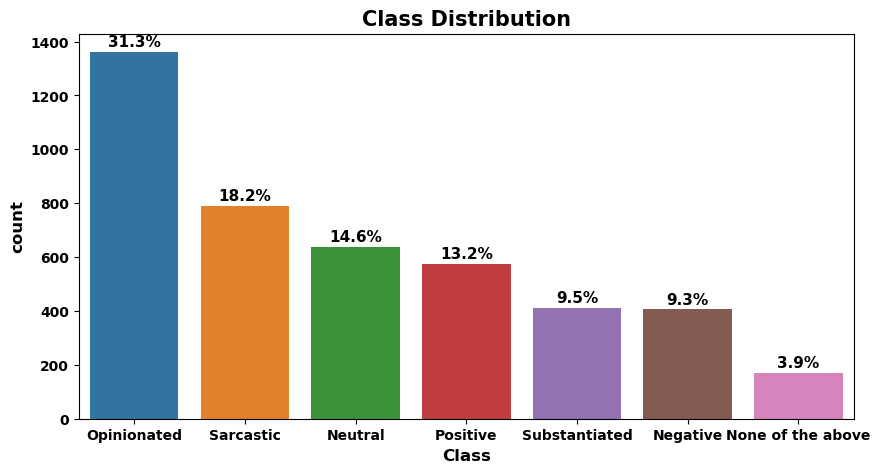

In [35]:
countplot(10,5,'labels',15,0,'Class','Class Distribution')

In [36]:
def countplot(fig_x,fig_y,col,top_x,rotation,xlabel,title) :
    plt.figure(figsize=(fig_x,fig_y))
    total = float(len(df))
    ax = sns.countplot(x=col,  data=val_df, order = val_df[col].value_counts().iloc[:top_x].index) 
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y),xytext = (x+0.05,y+20),ha = 'center',weight = 'bold',size = 11)
    plt.xticks(rotation = rotation,weight='bold',size = 10)
    plt.yticks(weight='bold',size = 10)
    plt.xlabel(xlabel,weight='bold',size = 12)
    plt.ylabel('count',weight='bold',size = 12)
    plt.title(title,weight='bold',size = 15)
    plt.show()

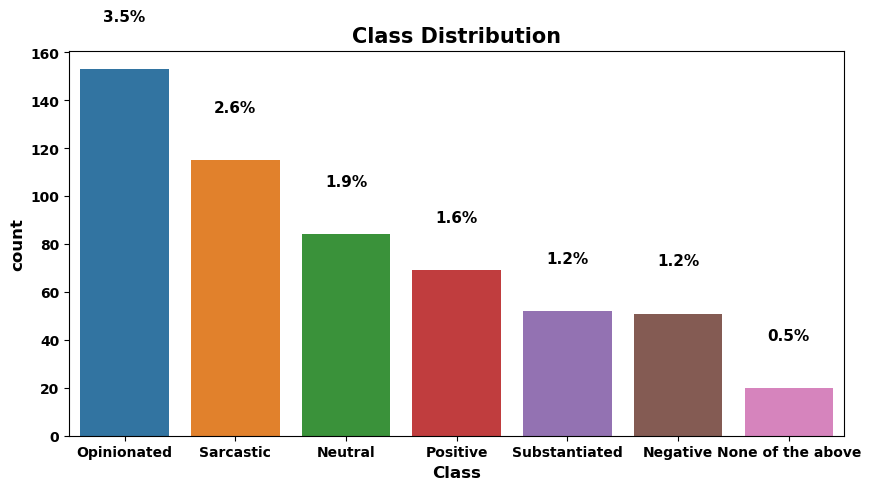

In [37]:
countplot(10,5,'labels',15,0,'Class','Class Distribution')

In [38]:
df.columns

Index(['content', 'labels', 'hashtag_count', 'mentions_count', 'url_count',
       'dollar_count', 'Length'],
      dtype='object')

In [39]:
val_df.columns

Index(['content', 'labels', 'hashtag_count', 'mentions_count', 'url_count',
       'dollar_count', 'Length'],
      dtype='object')

In [40]:
df.drop(columns=['hashtag_count', 'mentions_count', 'url_count', 'dollar_count','Length'], inplace=True)

In [41]:
test_df.drop(columns=['hashtag_count', 'mentions_count', 'url_count', 'dollar_count'], inplace=True)

In [42]:
val_df.drop(columns=['hashtag_count', 'mentions_count', 'url_count', 'dollar_count','Length'], inplace=True)

In [43]:
df.columns

Index(['content', 'labels'], dtype='object')

In [44]:
val_df.columns

Index(['content', 'labels'], dtype='object')

In [45]:
test_df.columns

Index(['Id', 'content', 'labels'], dtype='object')

In [46]:
test_df.to_csv("../Dataset/tamil_test_cleaned.csv", index=False)

In [47]:
df.to_csv("../Dataset/tamil_train_cleaned.csv", index=False)
val_df.to_csv("../Dataset/tamil_val_cleaned.csv", index=False)

In [48]:
with pd.option_context('display.max_colwidth',0):
    display(df.sample(n=10))

,content,labels
3689,""" மகன் திருடனை விட அப்பா திருடனே மேல் ""\n\nஅப்பா திருடன் - கருணாநிதி\nமகன் திருடன் - ஸ்டாலின்\n\nமூன்றாவதாக பேரன் திருடன் தயாராகி கொண்டிருக்கிறார்.\n\n\n-செந்தமிழன் சீமான் \nதலைமை ஒருங்கிணைப்பாளர்\n\nseeman | ntk |\n\nசீமானின்_சின்னம்_ஒலிவாங்கி\nntk_symbol_mike\nelections2024",Neutral
363,"திருநெல்வேலி மழை வெள்ள நிவாரண பணி, எண்ணற்ற மக்கள் போராட்டம் என்று களத்தில் இருக்கும் அக்கா சத்யா. திருநெல்வேலி நாடாளுமன்ற தொகுதி! நாம் தமிழர் வெல்வது உறுதி! சீமானின்_சின்னம்_ஒலிவாங்கி ntk_symbol_mike மக்களின்_சின்னம்_மைக்",Positive
1353,கோவையில் மிகவும் பிரம்மாண்டமான முறையில் இந்தியாவே திரும்பிப் பார்க்கும்\n வகையில் நடைபெற்ற தளபதி மற்றும் ஒற்றுமை நாயகன் இணைந்து பங்குபெற்று பேருரையாற்றிய கூட்டத்தில் பங்குபெற்றது மகிழ்ச்சி!\n\nmkstalin rahul_gandhi rahulgandhivoiceofindia rahulgandhi,Opinionated
2868,பரந்தூர் \n\nstopparandurairport,Neutral
30,மக்களை கவரும் கோவை கலாமணி பரப்புரை! | seeman | ntk | kalamani | coim. - தமிழ் முரசு - கொட்டும் முரசு,Opinionated
1238,ஜுன் 19 வாக்குப்பதிவு ஜுன் 4 ஓட்டு\nஎண்ணிக்கை - சின்னது \n\nஇவனும் தத்தி தான் போல!\naravindkejriwal delhi aap\n\nenforcementdirectorate ipl2024\nannamalai senthilbalaji 2gscam\nloksabhaelections2024 edraid\ndmkfailstn drug_mafia_dmk,Sarcastic
4242,போலி திராவிடத்தை தோலுரித்த சாமானியன்\n\nதிமுக_நாட்டுக்கும்_வீட்டுக்கும்_கேடு dmkfailstn,Opinionated
2312,ஒட்டுக் கேட்கப்படும் phoneகள்?\nannamalai mkstalin,Opinionated
824,விடியா அரசின் சாதனைகளில் இதுவும் ஒன்றா? \n\ndmkfailstn விடியா_அரசு,Neutral
2835,கம்யுனிஸ்ட் என்பதை மறந்து \nவரி உயர்வு \nவிலைவாசி உயர்வு \nவிவசாயிகள் மீது குண்டாஸ் என\nதிமுக ஆட்சியில் நடக்கும் \nஅவலங்களை கண்டும் காணாமல்\nஅறிவாலயத்துக்கு கொத்தடிமையா\nவேலை செஞ்சா இப்படித்தான்.\n\nloksabhaelections2024\ntamilnadu dmkfailstn elections2024\n,Opinionated
